In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data_cleanup/clean_data.csv")

# analysis - Tasks

Which tasks are most commonly tackled by popular models ?

'model_name', 'created_at', 'tasks', 'NB_tasks'

In [3]:
col_name = ['model_name','created_at','tasks','NB_tasks']
df = df[col_name]
df

,model_name,created_at,tasks,NB_tasks
0,albert,2022-03-02,fill-mask,1
1,albert,2022-03-02,fill-mask,1
2,albert,2022-03-02,fill-mask,1
3,albert,2022-03-02,fill-mask,1
4,albert,2022-03-02,fill-mask,1
...,...,...,...,...
44706,mmervecerit,2024-01-24,"vit,image-classification,generated_from_trainer",3
44707,jsfs11,2024-01-24,"text-generation,text-generation-inference",2
44708,PetroGPT,2024-01-24,"text-generation,text-generation-inference",2
44709,tinywell,2024-01-24,"ml-agents,huggy,deep-reinforcement-learning,re...",5


# Which tasks are the most common ?

In [4]:
df = df.assign(tasks=df['tasks'].str.split(',')).explode('tasks')
task_counts = df['tasks'].value_counts().reset_index()
task_counts.columns = ['task', 'task_count']
task_counts = task_counts.sort_values(by='task_count', ascending=False)

print(task_counts)

                                     task  task_count
0               text-generation-inference       10889
1                         text-generation       10283
2                     text-classification        6745
3                               diffusers        6662
4                  reinforcement-learning        5925
..                                    ...         ...
654                  llava_stablelm_epoch           1
653                     classic animation           1
652                            text-2-sql           1
651                  inference-extraction           1
967  joint_aed_ctc_speech-encoder-decoder           1

[968 rows x 2 columns]


In [5]:
task_counts = task_counts[task_counts['task_count'] >= 500]
print(task_counts)

                             task  task_count
0       text-generation-inference       10889
1                 text-generation       10283
2             text-classification        6745
3                       diffusers        6662
4          reinforcement-learning        5925
5     deep-reinforcement-learning        5914
6                   text-to-image        5362
7                       ml-agents        5299
8                stable-diffusion        3668
9            text2text-generation        3181
10                    model-index        2770
11         generated_from_trainer        2672
12                ml-agents-huggy        2126
13                unity-ml-agents        2067
14           image-classification        1995
15     stable-diffusion-diffusers        1586
16                      fill-mask        1558
17             feature-extraction        1461
18                          huggy        1428
19           token-classification        1341
20       ml-agents-snowballtarget 

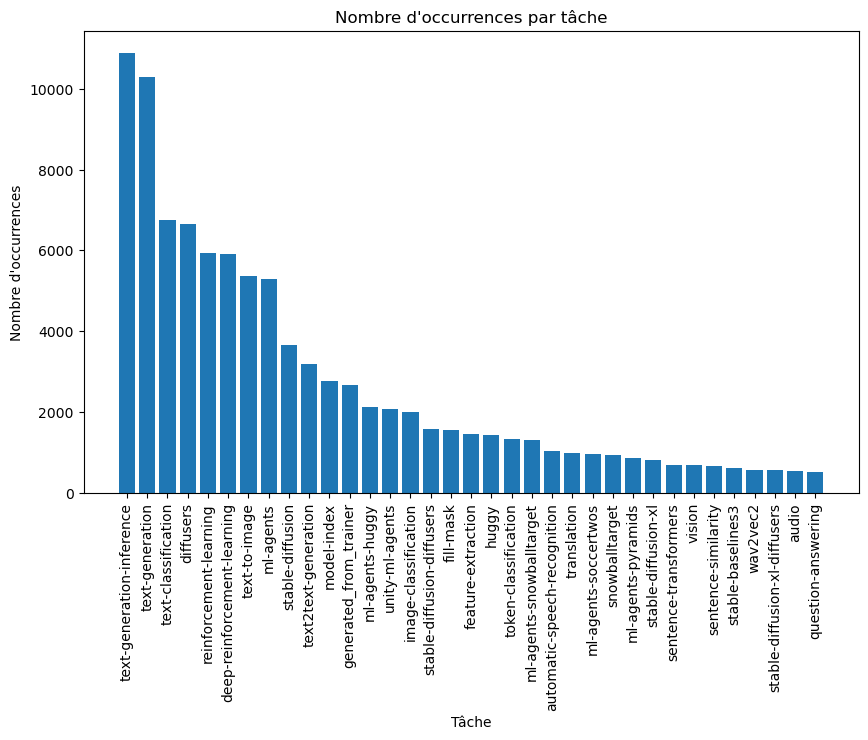

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(task_counts['task'], task_counts['task_count'])
plt.xlabel('Tâche')
plt.ylabel('Nombre d\'occurrences')
plt.title('Nombre d\'occurrences par tâche')
plt.xticks(rotation=90)
plt.show()

# How many tasks do the models perform? 

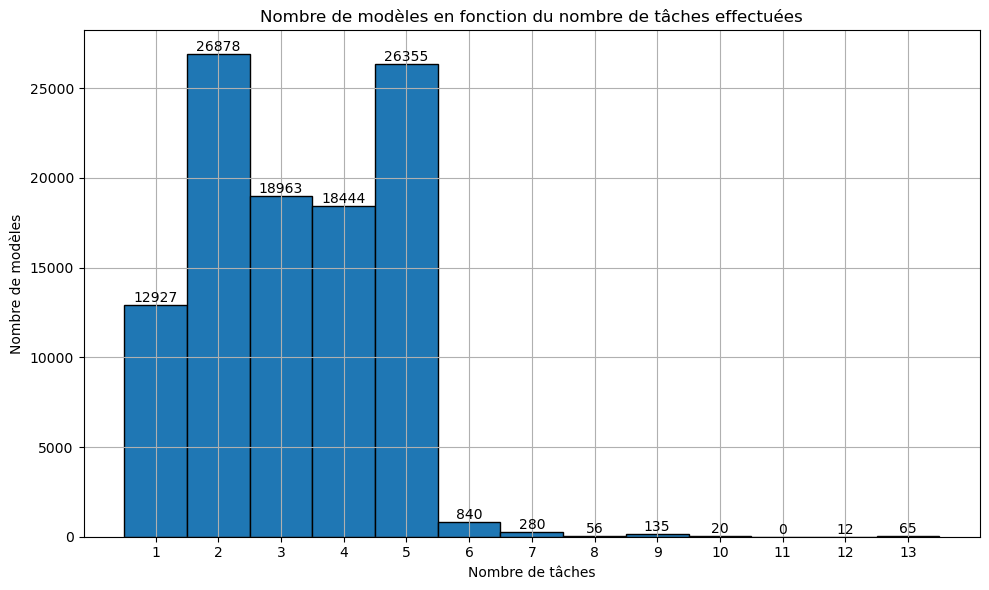

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['NB_tasks'], bins=range(1, df['NB_tasks'].max() + 2), align='left', edgecolor='black')
plt.xlabel('Nombre de tâches')
plt.ylabel('Nombre de modèles')
plt.title('Nombre de modèles en fonction du nombre de tâches effectuées')
plt.xticks(range(1, df['NB_tasks'].max() + 1))
plt.grid(True)

for i in range(1, df['NB_tasks'].max() + 1):
    count = (df['NB_tasks'] == i).sum()
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()